In [26]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from albumentations import HorizontalFlip, VerticalFlip, ShiftScaleRotate, GaussNoise, MedianBlur, RandomContrast, ChannelShuffle, Rotate, InvertImg, MultiplicativeNoise

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [3]:
malignant = train_df[train_df['benign_malignant'] == 'malignant'].image_name.values
benign = train_df[train_df['benign_malignant'] == 'benign'].image_name.values

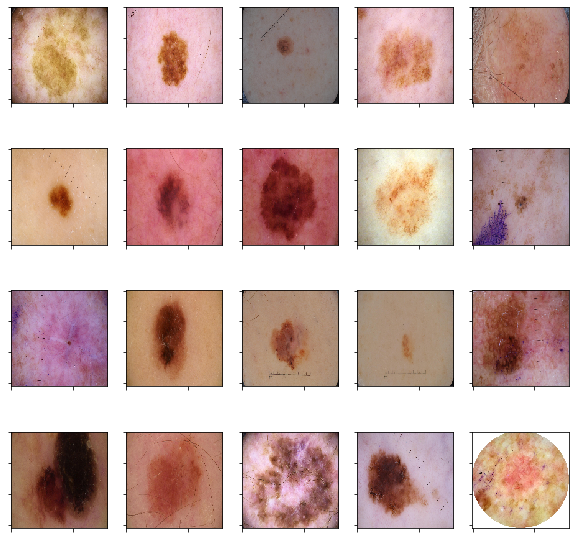

In [4]:
fig = plt.figure(figsize = (10,10))
ax= []
for i in range(1,21):    
    img = cv2.imread('jpeg/train/' + malignant[i] + '.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(156,156))
    ax.append(fig.add_subplot(4,5,i))
    ax[-1].set_xticklabels('')
    ax[-1].set_yticklabels('')
    plt.imshow(img)
plt.show()

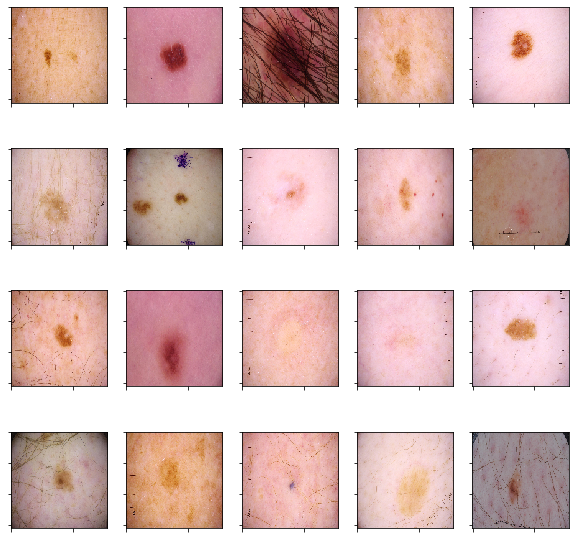

In [5]:
fig = plt.figure(figsize = (10,10))
ax= []
for i in range(1,21):    
    img = cv2.imread('jpeg/train/' + benign[i] + '.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(156,156))
    ax.append(fig.add_subplot(4,5,i))
    ax[-1].set_xticklabels('')
    ax[-1].set_yticklabels('')
    plt.imshow(img)
plt.show()

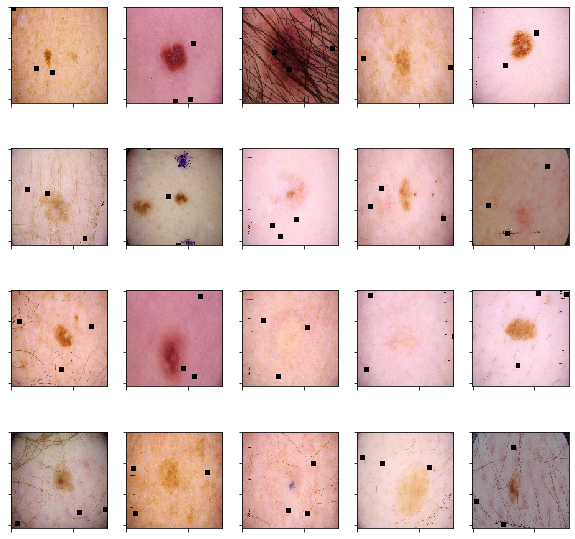

In [28]:
fig = plt.figure(figsize = (10,10))
ax= []
hf = Cutout(num_holes=3, max_h_size=8, max_w_size=8, fill_value=0, p=1)
for i in range(1,21):    
    img = cv2.imread('jpeg/train/' + benign[i] + '.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(156,156))
    img_gaus = hf(image = img)
    img = img_gaus['image']
    ax.append(fig.add_subplot(4,5,i))
    ax[-1].set_xticklabels('')
    ax[-1].set_yticklabels('')
    plt.imshow(img)
plt.show()